In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [39]:
data = pd.read_csv(r"C:\Users\dell\Downloads\movies.csv\movies.csv")

In [40]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [41]:
#cheking for missing data in each column

for col in data.columns:
    prc_null = (np.mean(data[col].isnull()))
    print(f' {col} : {prc_null}')

 name : 0.0
 rating : 0.010041731872717789
 genre : 0.0
 year : 0.0
 released : 0.0002608242044861763
 score : 0.0003912363067292645
 votes : 0.0003912363067292645
 director : 0.0
 writer : 0.0003912363067292645
 star : 0.00013041210224308815
 country : 0.0003912363067292645
 budget : 0.2831246739697444
 gross : 0.02464788732394366
 company : 0.002217005738132499
 runtime : 0.0005216484089723526


In [42]:
#droping the rows with null values
data.dropna(inplace=True)

In [43]:
for col in data.columns:
    prc_null = (np.mean(data[col].isnull()))
    print(f' {col} : {prc_null}')

 name : 0.0
 rating : 0.0
 genre : 0.0
 year : 0.0
 released : 0.0
 score : 0.0
 votes : 0.0
 director : 0.0
 writer : 0.0
 star : 0.0
 country : 0.0
 budget : 0.0
 gross : 0.0
 company : 0.0
 runtime : 0.0


In [44]:
#cheking the data types of each column
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [45]:
#changing the data types of the float column into integers

data.budget = data.budget.astype('int')
data.gross = data.gross.astype('int')
data.runtime = data.runtime.astype('int')

In [ ]:
#create correct year and country columns
data['nYear'] = ''

n=0
for i in data.released.astype('str').str.split('('):
    data['nYear'].iloc[n] = i[0]
    n = n+1
data['year'] = data.nYear.str[-5::]
data['year'] = data['year'].astype('int64')
data.drop(['nYear'], inplace=True, axis=1)

In [ ]:
#create correct year and country columns
data['ncountry'] = ''

n=0
for i in data.released.astype('str').str.split('('):
    data['ncountry'].iloc[n] = i[1]
    n = n+1

data['country'] = data.ncountry.str[0:-1]
data.drop(['ncountry'], inplace=True, axis=1)

In [46]:
#cheking the new data
data.country.unique()


array(['United Kingdom', 'United States', 'South Africa', 'West Germany',
       'Canada', 'Australia', 'Italy', 'South Korea', 'Sweden', 'Spain',
       'Hong Kong', 'Mexico', 'Switzerland', 'France', 'New Zealand',
       'Japan', 'Yugoslavia', 'Ireland', 'Germany', 'Austria', 'Portugal',
       'China', 'Taiwan', 'Republic of Macedonia', 'Russia',
       'Federal Republic of Yugoslavia', 'Iran', 'Czech Republic',
       'Denmark', 'Jamaica', 'Brazil', 'Aruba', 'Argentina', 'India',
       'Netherlands', 'Colombia', 'Norway', 'Israel', 'Belgium',
       'United Arab Emirates', 'Indonesia', 'Hungary', 'Kenya', 'Iceland',
       'Chile', 'Finland', 'Panama', 'Malta', 'Lebanon', 'Thailand'],
      dtype=object)

In [47]:
data.year.unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [49]:
#sorting the dataframe by gross revunue
data.sort_values(by='gross', ascending=False, inplace=False).tail()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800.0,George Huang,Andy Burg,Will Friedle,United States,15000000,309,Daybreak,85
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,-2147483648,Twentieth Century Fox,162


In [50]:
#removing the negative sine from some gross values
data.gross = data.gross.astype('str').str.replace('-', '')
data.gross = data.gross.astype('int64')

In [51]:
data.sort_values(by='gross', ascending=False, inplace=False).head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2147483648,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2147483648,Twentieth Century Fox,194
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2147483648,Twentieth Century Fox,162
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [ ]:
#finding reasons for high gross

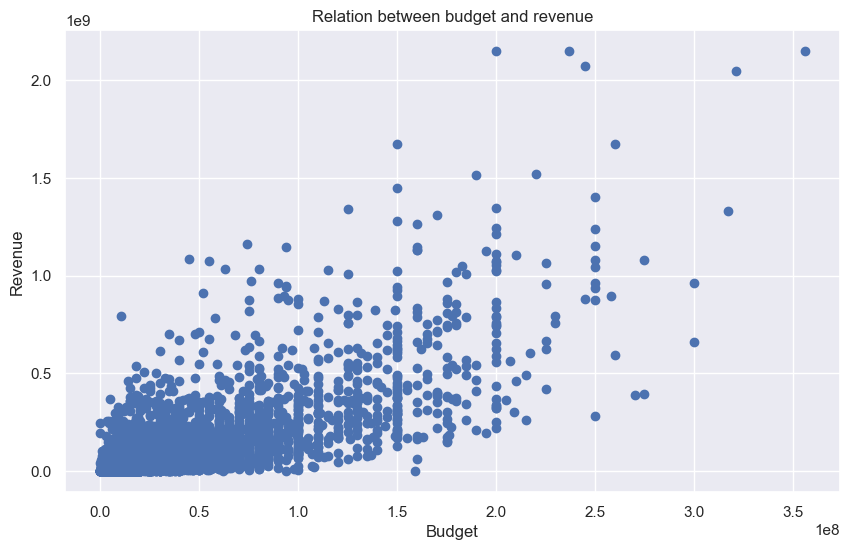

In [52]:
#scattering budget and gross

plt.figure(figsize=(10,6))
plt.scatter(data.budget, data.gross);
plt.xlabel('Budget');
plt.ylabel('Revenue');
plt.title('Relation between budget and revenue');

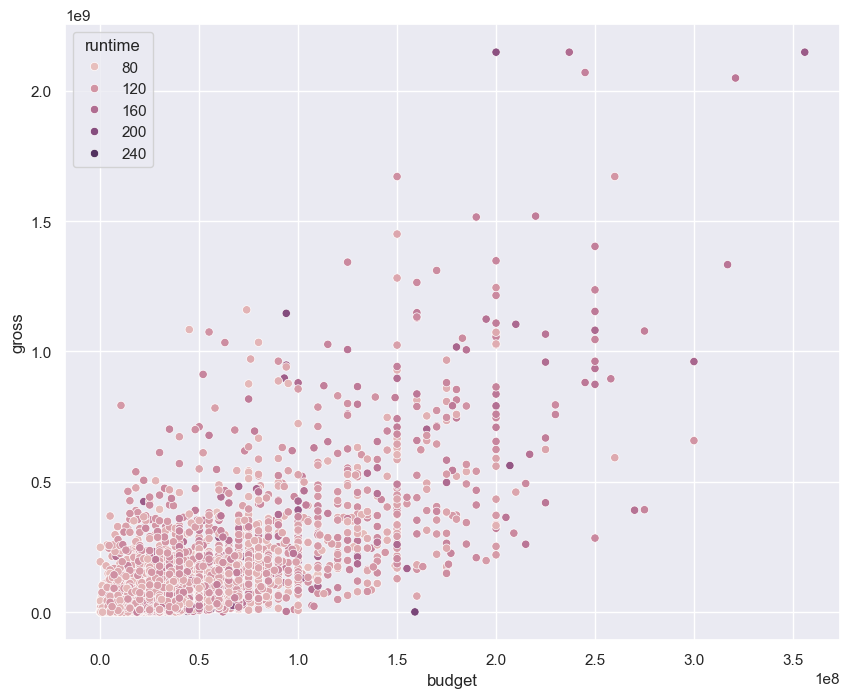

In [53]:
#looking at correlation between the budget, revunue and the runtime
plt.figure(figsize=(10,8));
sns.scatterplot(data=data, x='budget', y='gross', hue='runtime');

In [54]:
'''We can see that there is a positive relation between the budget size and the gross reveunues of the movies. And higher run time correlates with higher revunue.'''

'We can see that there is a positive relation between the budget size and the gross reveunues of the movies. And higher run time correlates with higher revunue.'

In [55]:
#to see the correlation level between each variable

data[['gross', 'budget', 'runtime']].corr()

,gross,budget,runtime
gross,1.000000,0.744928,0.275789
budget,0.744928,1.000000,0.318695
runtime,0.275789,0.318695,1.000000


In [56]:
'''We can see that the  correlation between the budget and the revenues is 0.74 wich is a high correlation. And runtime's correlations with the two variables are not that high as we thought from the graph as each one of them is below 0.4 wich is pretty low.'''

"We can see that the  correlation between the budget and the revenues is 0.74 wich is a high correlation. And runtime's correlations with the two variables are not that high as we thought from the graph as each one of them is below 0.4 wich is pretty low."

In [57]:
#now we will look for the correlation between non numeric variables like company.

In [58]:
'''we first give the non numeric variables a numeric value for each category,
starting with the astype function that will transform them from object type into category type 
and then using the cat.codes function that assing random codes to categories 
so that we can calculate the corr between each category.'''
df = data.copy()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes
    

In [60]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98


In [61]:
corr = df.corr()

In [62]:
corr[corr>0.5]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
released,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
votes,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.618978,NaN,NaN
director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
writer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
star,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [63]:
'''we can se that the only correlations that are greater than 0.5 are between the gross and the budget 
and also there is a high correlation between the gross and the votes at 0.61.'''

'we can se that the only correlations that are greater than 0.5 are between the gross and the budget \nand also there is a high correlation between the gross and the votes at 0.61.'